[[(192, 204), (374, 214), (194, 272), (417, 259), (182, 282), (166, 228), (171, 250), (308, 293), (312, 321), (422, 126), (443, 187), (182, 174), (413, 205), (435, 166), (147, 255), (463, 174), (385, 256), (447, 137), (221, 287), (398, 237), (274, 263), (389, 183), (253, 292), (358, 235), (252, 316), (137, 186), (321, 250), (400, 154), (204, 298), (249, 263), (136, 246), (434, 222), (147, 205), (208, 230), (332, 280), (393, 288), (349, 313)], [(101, 131), (47, 159), (220, 82), (80, 156), (154, 64), (84, 112), (155, 94), (261, 131), (271, 111), (299, 136), (231, 114), (308, 124), (56, 178), (242, 70), (47, 128), (123, 104), (286, 161), (191, 100), (244, 92), (64, 150), (192, 62), (128, 78), (272, 95), (275, 137), (106, 90)]]


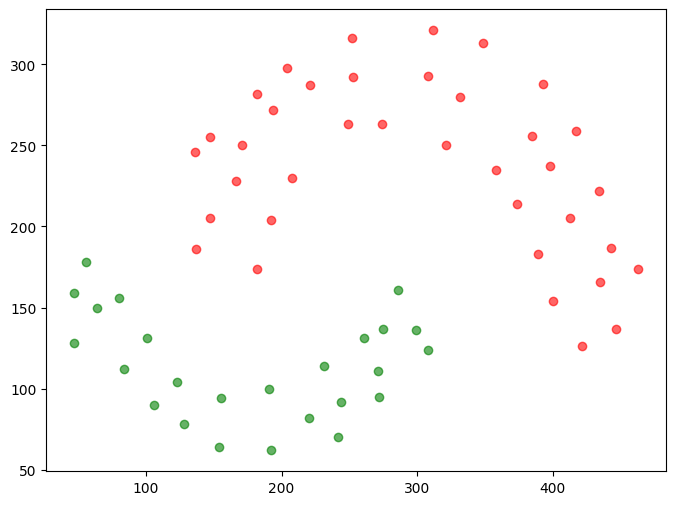

In [ ]:
# @title Кластеризация поиском в глубину (DFS)
import numpy as np
from math import hypot # для вычисления расстояния между точками
import matplotlib.pyplot as plt

# Обход в глубину (DFS)
def dfs(graph, node, visited=None): # нода это вершина или узел (синонимы)
    if visited is None:
        visited = set()

    # Отметим текущий узел как посещенный
    visited.add(node)

    # Рекурсивно посетим всех соседей текущего узла
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

    return visited

# Поиск всех компонент
def find_connected_components(graph):
    components = set()
    unvisited_nodes = set(graph.keys())

    while unvisited_nodes:
        start_node = next(iter(unvisited_nodes))
        component = frozenset(dfs(graph, start_node))

        # Добавляем найденную компоненту к множеству и удаляем ее из непосещенных узлов
        components.add(component)

        unvisited_nodes -= component

    return components

# Данные из лекции
P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]
eps = 60

# Граф (список смежности / или список вершин) с присвоением имён каждой точке
g = {f'{i}': [] for i in range(len(P))} # создаём ключи по индексам и к ним пустые списки
for i in range(len(P)):
    for j in range(len(P)):
        if i != j:
            if hypot(P[i][0] - P[j][0], P[i][1] - P[j][1]) < eps:
                g[f'{i}'].append(f'{j}')

components_result = find_connected_components(g)

# Приводим к виду, как в лекции
clusters = [[P[int(i)] for i in component] for component in components_result]
print(clusters)

# Визуализация
colors = ['r', 'g']
plt.figure(figsize=(8, 6))

for i, xx in enumerate(clusters):
    xx = np.array(xx)
    if len(xx) > 0:
        plt.scatter(xx[:, 0], xx[:, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

In [ ]:
import math

def dfs_recursive(graph, node, visited=None):
    if visited is None:
        visited = set()

    # Отметим текущий узел как посещенный
    visited.add(node)

    # Рекурсивно посетим всех соседей текущего узла
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)

    return visited

def find_connected_components(graph):
    components = []
    unvisited_nodes = set(graph.keys())

    while unvisited_nodes:
        start_node = next(iter(unvisited_nodes))
        component = dfs_recursive(graph, start_node)

        # Добавляем найденную компоненту к списку и удаляем ее из непосещенных узлов
        components.append(component)

        unvisited_nodes -= component

    return components

P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82),
     # ... остальные точки ...
     ]

eps = 60

# Граф с присвоением имён каждой точке
g = {f'{i}': [] for i in range(len(P))}

for i in range(len(P)):
    for j in range(len(P)):
        if i != j:
            if math.hypot(P[i][0] - P[j][0], P[i][1] - P[j][1]) < eps:
                g[f'{i}'].append(f'{j}')

components_list_indices = find_connected_components(g)

# Разделение списка P по компонентам связности
components_P_listed_by_indices = [[P[int(i)] for i in component] for component in components_list_indices]

print(components_P_listed_by_indices)


[[(220, 82), (154, 64), (84, 112), (64, 150), (192, 62), (106, 90)]]
